In [121]:
import numpy as np
import pandas as pd


In [122]:
data = pd.read_csv('./data.csv')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [123]:
print(data.shape)

(5572, 5)


## Step 1: Data cleaning
- getting information of data
- rename columns
- covert target
- check missing data
- check duplicates in data

In [124]:
print(data.info)

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will �_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [125]:
#drop last 3 col
data = data.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis=1)

In [126]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [127]:
# rename col
data.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
data

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Convert target to 0 and 1

In [128]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [129]:
data['target'] = encoder.fit_transform(data['target'])
data

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [130]:
# missing values
data.isnull().sum()

target    0
text      0
dtype: int64

In [131]:
# check fot duplicated values

In [132]:
data.duplicated().sum()

403

In [133]:
data = data.drop_duplicates(keep='first')

In [134]:
data.duplicated().sum()

0

### Step 2: EDA (Exploratory Data Analysis)

In [135]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x1fca3a6f400>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'not spam'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

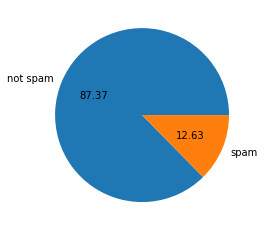

In [136]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(), labels=['not spam', 'spam'], autopct='%0.2f')

In [137]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [138]:
# create a columns has num of character
data['num_character'] = data['text'].apply(len)
# count num of word
data['num_of_word'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))
# count sentences
data['num_sentences'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

data

C:\Users\DELL\AppData\Local\Temp\ipykernel_18340\3051814824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_character'] = data['text'].apply(len)
C:\Users\DELL\AppData\Local\Temp\ipykernel_18340\3051814824.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_of_word'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))
C:\Users\DELL\AppData\Local\Temp\ipykernel_18340\3051814824.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

,target,text,num_character,num_of_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will �_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [139]:
data[['num_character', 'num_of_word', 'num_sentences']].describe()

,num_character,num_of_word,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.924163,18.454246,1.948152
std,58.175349,13.325668,1.363792
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [140]:
# Not Spam
data.loc[data['target'] == 0, ['num_character', 'num_of_word', 'num_sentences']].describe()

,num_character,num_of_word,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.457263,17.120903,1.799601
std,56.357463,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [141]:
#Spam
data.loc[data['target'] == 1, ['num_character', 'num_of_word', 'num_sentences']].describe()

,num_character,num_of_word,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.975498
std,30.014336,7.011513,1.487993
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


In [142]:
import seaborn as sns

<AxesSubplot:xlabel='num_character', ylabel='Count'>

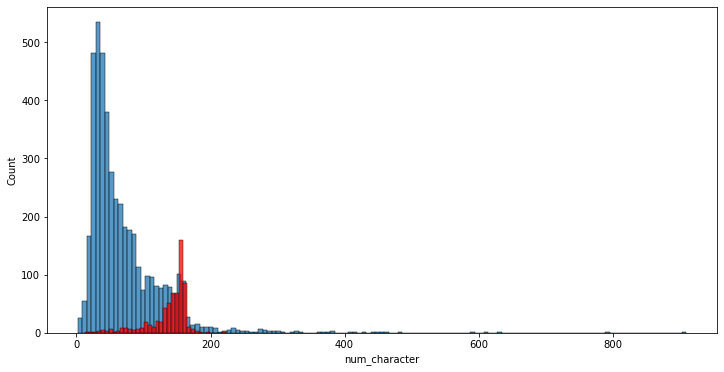

In [143]:
plt.figure(figsize=[12,6])
sns.histplot(data[data['target']==0]['num_character'])
sns.histplot(data[data['target']==1]['num_character'] , color='red')

<AxesSubplot:xlabel='num_of_word', ylabel='Count'>

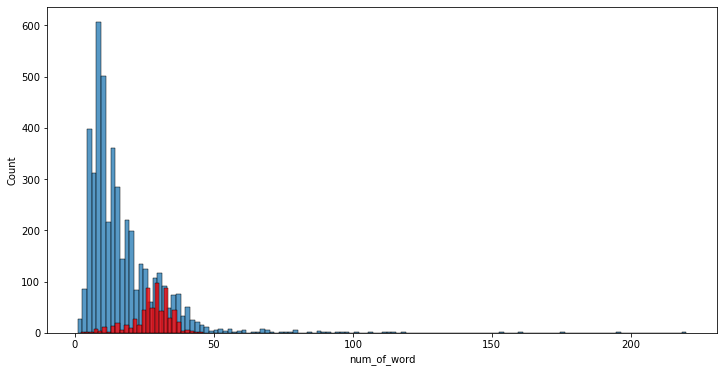

In [144]:
plt.figure(figsize=[12,6])
sns.histplot(data[data['target']==0]['num_of_word'])
sns.histplot(data[data['target']==1]['num_of_word'] , color='red')

<Figure size 1080x360 with 0 Axes>

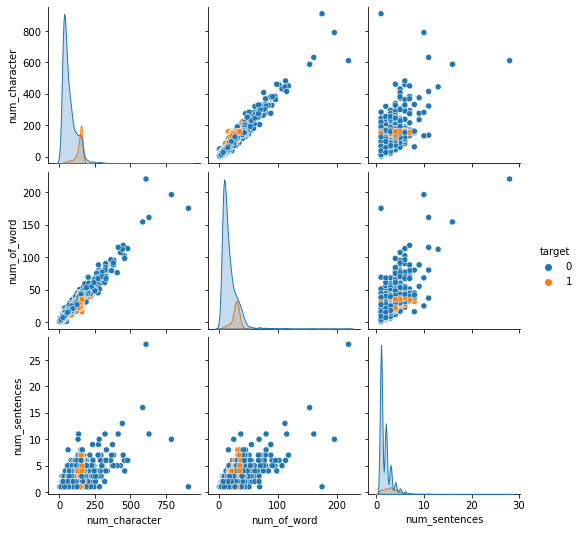

In [145]:
plt.figure(figsize=[15,5])
sns.pairplot(data, hue='target')

<AxesSubplot:>

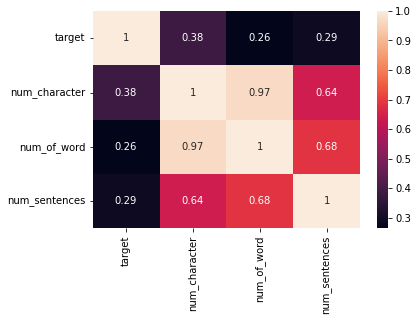

In [146]:
sns.heatmap(data.corr() , annot=True)

### Step 3: Data Preprocessing
- Lower case
- Tokenization
- Removing special character
- Removing stop words and punctuation
- Stemming

In [147]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [162]:
def transform_text(text: str):
    text = text.lower()
    text = nltk.word_tokenize(text)

    text = [i for i in text if i.isalnum() and i not in stopwords.words('english') and i not in string.punctuation]

    #Stemming word
    ps = PorterStemmer()
    text = " ".join([ps.stem(word) for word in text])
    return text

data['transform_text'] = data['text'].apply(transform_text)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18340\383108773.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transform_text'] = data['text'].apply(transform_text)


In [163]:
data

,target,text,num_character,num_of_word,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will �_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [190]:
spam_corpus = []
for msg in data[data['target']==1]['transform_text']:
    spam_corpus.extend(msg.split())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia')])

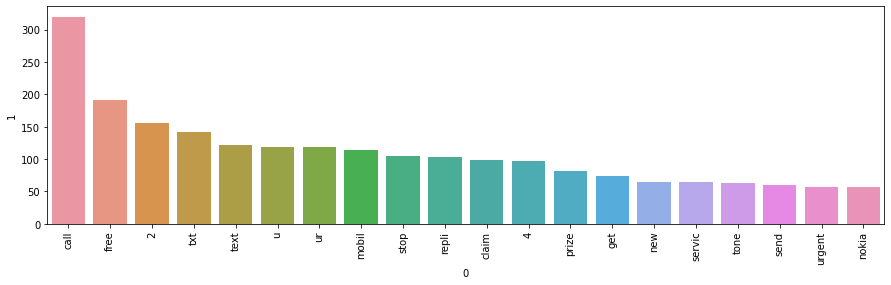

In [189]:
from collections import Counter
plt.figure(figsize=[15,4])
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(20))[0],pd.DataFrame(Counter(spam_corpus).most_common(20))[1])
plt.xticks(rotation='vertical')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia')])

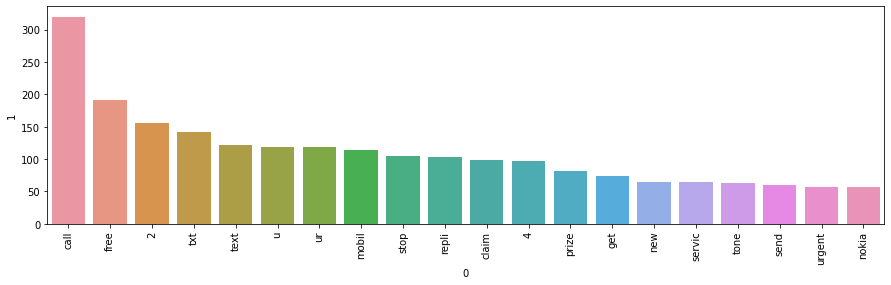

In [191]:
not_spam_corpus = []
for msg in data[data['target']==1]['transform_text']:
    not_spam_corpus.extend(msg.split())
plt.figure(figsize=[15,4])
sns.barplot(pd.DataFrame(Counter(not_spam_corpus).most_common(20))[0],pd.DataFrame(Counter(not_spam_corpus).most_common(20))[1])
plt.xticks(rotation='vertical')

### Step 4: Building Model

In [220]:
from sklearn.feature_extraction.text import  TfidfVectorizer
tv = TfidfVectorizer(max_features=3000)


In [221]:
X = tv.fit_transform(data['transform_text']).toarray()
X.shape

(5169, 3000)

In [222]:
y = data['target'].values
y.shape

(5169,)

In [223]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [224]:
# Choosing model
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [225]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [226]:
gnb.fit(X_train, y_train)
mnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)
models = {
    "GaussianNB" : gnb,
    "MultinomialNB" : mnb,
    "BernoulliNB": bnb
}

In [227]:
for name_model, model in models.items():
    print(f'Accuracy on training data of {name_model} is: {model.score(X_train, y_train)}')
    print(f'Accuracy on testing data of {name_model} is: {model.score(X_train, y_train)}')
    print()

Accuracy on training data of GaussianNB is: 0.8918984280532044
Accuracy on testing data of GaussianNB is: 0.8918984280532044

Accuracy on training data of MultinomialNB is: 0.9789600967351875
Accuracy on testing data of MultinomialNB is: 0.9789600967351875

Accuracy on training data of BernoulliNB is: 0.9854897218863361
Accuracy on testing data of BernoulliNB is: 0.9854897218863361

